In [196]:
from altaipony.ffd import FFD 
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt




6.87362349239785e+33

In [217]:
oka = pd.read_csv("../data/okamoto/okamoto.tsv", sep="\t", skiprows=48, header=None,
                  names=["KIC", "Teff", "e_Teff", "Rstar", "E_Rstar", "e_Rstar", "Prot",
                         "e_Prot", "Amp", "Kemag", "Aspot", "Date", "Dur", "E", "Flag"])

okasel = oka[(oka["Teff"] > 5500) & (oka["Teff"] < 5800) & (oka["Prot"] < 2) & (oka["Prot"] > 1)]
kics = okasel.groupby("KIC").count().index
okasel["ed_rec"] = okasel["E"]
kics

/tmp/ipykernel_95716/3814879837.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  okasel["ed_rec"] = okasel["E"]


Index([3834913, 3869649, 4142137, 8848528, 11818232], dtype='int64', name='KIC')

In [218]:
import lightkurve as lk

No total observing time given. Set to 1. You are now working with number counts instead of frequency.
/tmp/ipykernel_95716/4291930770.py:7: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  lcs = lk.search_lightcurvefile(f"KIC {kic}", mission="Kepler", cadence="long").download_all()
1% (13/1639) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (13/1639) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
3% (119/4194) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
3% (119/4194) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (88/4228) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (88/4228) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (43/4159) of the cadenc

<TableColumns names=('time','flux','flux_err','quality','timecorr','centroid_col','centroid_row','cadenceno','sap_flux','sap_flux_err','sap_bkg','sap_bkg_err','pdcsap_flux','pdcsap_flux_err','sap_quality','psf_centr1','psf_centr1_err','psf_centr2','psf_centr2_err','mom_centr1','mom_centr1_err','mom_centr2','mom_centr2_err','pos_corr1','pos_corr2')>
KIC 3834913 1240.2916666666667 days


/home/ilin/anaconda3/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
/home/ilin/anaconda3/lib/python3.11/site-packages/altaipony/wheatland.py:313: RuntimeWarning: invalid value encountered in log
  f2 = M * np.log(alpha - 1)
100%|██████████| 500/500 [00:01<00:00, 322.42it/s]
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
/tmp/ipykernel_95716/4291930770.py:7: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  lcs = lk.search_lightcurvefile(f"KIC {kic}", mission="Kepler", cadence="long").download_all()
1% (13/1639) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (13/1639) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
3% (119/4194) of the caden

       time             flux      ...   pos_corr1      pos_corr2   
                                  ...      pix            pix      
------------------ -------------- ... -------------- --------------
131.51293178353808  1.0280688e+00 ... -2.7494436e-02  7.9730175e-02
 131.5333663717829  1.0231050e+00 ... -2.7451195e-02  7.9309218e-02
131.55380085991783  1.0249963e+00 ... -2.7348140e-02  7.9160459e-02
 131.5742352479283  1.0262817e+00 ... -2.7190113e-02  7.9059109e-02
131.59466973571398  1.0274950e+00 ... -2.7863218e-02  7.8560427e-02
131.61510432350042  1.0279583e+00 ... -2.7911443e-02  7.8752682e-02
 131.6355387110525  1.0281219e+00 ... -2.7745010e-02  7.8713223e-02
131.65597319848166  1.0274495e+00 ... -2.7871678e-02  7.8662820e-02
131.67640778580244  1.0252467e+00 ... -2.7887510e-02  7.8440994e-02
               ...            ... ...            ...            ...
1590.8179562844016  9.5586807e-01 ... -7.2615471e-04  1.5634226e-02
1590.8383909573458  9.4967246e-01 ... -7.5479847

1% (46/4538) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (46/4538) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (66/4295) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (66/4295) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (30/3143) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (30/3143) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (85/4703) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (85/4703) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (80/4560) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (80/4560) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
10% (414/3965) of the cadences will be i

<TableColumns names=('time','flux','flux_err','quality','timecorr','centroid_col','centroid_row','cadenceno','sap_flux','sap_flux_err','sap_bkg','sap_bkg_err','pdcsap_flux','pdcsap_flux_err','sap_quality','psf_centr1','psf_centr1_err','psf_centr2','psf_centr2_err','mom_centr1','mom_centr1_err','mom_centr2','mom_centr2_err','pos_corr1','pos_corr2')>
KIC 3869649 929.6041666666666 days


/home/ilin/anaconda3/lib/python3.11/site-packages/altaipony/wheatland.py:313: RuntimeWarning: invalid value encountered in log
  f2 = M * np.log(alpha - 1)
100%|██████████| 500/500 [00:01<00:00, 310.79it/s]
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
/tmp/ipykernel_95716/4291930770.py:7: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  lcs = lk.search_lightcurvefile(f"KIC {kic}", mission="Kepler", cadence="long").download_all()
1% (3/476) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (3/476) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (13/1639) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (13/1639) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
3% (119/4194) of 

       time             flux      ...   pos_corr1      pos_corr2   
                                  ...      pix            pix      
------------------ -------------- ... -------------- --------------
 131.5122489919595  9.6452779e-01 ...  4.8007681e-03  5.1918264e-02
131.53268370721344  9.6520793e-01 ...  4.7457265e-03  5.1519174e-02
 131.5531183224739  9.6626520e-01 ...  4.8279176e-03  5.1356763e-02
 131.5735528376099  9.6835053e-01 ...  5.1293503e-03  5.1604584e-02
131.59398745275394  9.6952879e-01 ...  4.9212147e-03  5.1572543e-02
131.61442216778232  9.7040057e-01 ...  4.9296063e-03  5.1678568e-02
 131.6348566828092  9.7160226e-01 ...  4.9015214e-03  5.1722046e-02
131.65529129771312  9.7354376e-01 ...  4.6049519e-03  5.1654890e-02
 131.6757260126251  9.7481489e-01 ...  4.8396769e-03  5.1599108e-02
               ...            ... ...            ...            ...
 1590.817171613984  1.0030140e+00 ... -7.1707144e-03  2.7384492e-02
1590.8376063032338  1.0012680e+00 ... -7.0785112

1% (46/4538) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (46/4538) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (37/4313) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (37/4313) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (66/4295) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (66/4295) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (44/4491) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (44/4491) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (30/3143) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (30/3143) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (85/4703) of the cadences will be ign

<TableColumns names=('time','flux','flux_err','quality','timecorr','centroid_col','centroid_row','cadenceno','sap_flux','sap_flux_err','sap_bkg','sap_bkg_err','pdcsap_flux','pdcsap_flux_err','sap_quality','psf_centr1','psf_centr1_err','psf_centr2','psf_centr2_err','mom_centr1','mom_centr1_err','mom_centr2','mom_centr2_err','pos_corr1','pos_corr2')>
KIC 4142137 1198.3958333333333 days


/home/ilin/anaconda3/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 500/500 [00:01<00:00, 266.87it/s]
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
/tmp/ipykernel_95716/4291930770.py:7: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  lcs = lk.search_lightcurvefile(f"KIC {kic}", mission="Kepler", cadence="long").download_all()
1% (3/476) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (3/476) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (13/1639) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (13/1639) of the cadences will be ignored due to the quality mask (quality_bitmask=1130

       time             flux      ...   pos_corr1      pos_corr2   
                                  ...      pix            pix      
------------------ -------------- ... -------------- --------------
120.53953680865379  1.0057513e+00 ... -2.2699467e-03 -1.1863687e-02
120.55997135499638  1.0026355e+00 ... -1.8710410e-03 -1.1235149e-02
 120.5804058013382  1.0023113e+00 ... -2.4311508e-03 -1.0678012e-02
120.60084044755786  1.0020789e+00 ... -2.3150824e-03 -9.9421777e-03
120.62127499366761  1.0019767e+00 ... -2.7946655e-03 -9.0381531e-03
 120.6417094397766  1.0022897e+00 ... -3.1123001e-03 -8.7139495e-03
120.66214398576267  1.0022848e+00 ... -2.8764214e-03 -8.2396315e-03
120.68257863175677  1.0022949e+00 ... -3.0084064e-03 -8.0920095e-03
120.70301307751652  1.0018420e+00 ... -2.8810089e-03 -7.9887193e-03
               ...            ... ...            ...            ...
1590.8178977188218  1.0046699e+00 ... -7.1049249e-04 -1.6496172e-02
1590.8383323869348  1.0051682e+00 ... -7.0216146

1% (46/4538) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (46/4538) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (37/4313) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (37/4313) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (66/4295) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (66/4295) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (44/4491) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (44/4491) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (30/3143) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (30/3143) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (85/4703) of the cadences will be ign

<TableColumns names=('time','flux','flux_err','quality','timecorr','centroid_col','centroid_row','cadenceno','sap_flux','sap_flux_err','sap_bkg','sap_bkg_err','pdcsap_flux','pdcsap_flux_err','sap_quality','psf_centr1','psf_centr1_err','psf_centr2','psf_centr2_err','mom_centr1','mom_centr1_err','mom_centr2','mom_centr2_err','pos_corr1','pos_corr2')>
KIC 8848528 1240.6666666666667 days


/home/ilin/anaconda3/lib/python3.11/site-packages/altaipony/wheatland.py:313: RuntimeWarning: invalid value encountered in log
  f2 = M * np.log(alpha - 1)
100%|██████████| 500/500 [00:01<00:00, 298.62it/s]
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
/tmp/ipykernel_95716/4291930770.py:7: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  lcs = lk.search_lightcurvefile(f"KIC {kic}", mission="Kepler", cadence="long").download_all()
1% (13/1639) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (13/1639) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
3% (119/4194) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
3% (119/4194) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (88/4228

       time             flux      ...   pos_corr1      pos_corr2   
                                  ...      pix            pix      
------------------ -------------- ... -------------- --------------
120.53830540047056  1.0004224e+00 ... -1.8046671e-03 -1.2363968e-03
120.55873987799714  9.9817908e-01 ... -2.0661582e-03 -1.1091341e-03
120.57917425558117  9.9833894e-01 ... -1.7378052e-03 -8.5362402e-04
120.59960883324675  9.9833608e-01 ... -2.2792290e-03 -1.7987036e-04
120.62004331097705  9.9851227e-01 ... -1.7420731e-03  3.5973502e-05
120.64047768875025  9.9837428e-01 ... -1.8969944e-03  5.5103278e-04
120.66091216660425  9.9843431e-01 ... -1.9195995e-03  5.6540588e-04
120.68134674452449  9.9813932e-01 ... -1.7763644e-03  5.9238623e-04
120.70178112251597  9.9820364e-01 ... -1.8829741e-03  5.5614964e-04
               ...            ... ...            ...            ...
1590.8167535687826  1.0004151e+00 ...  1.6670324e-02  3.4301218e-02
1590.8371880616323  1.0003322e+00 ...  1.6670212

1% (37/4313) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (37/4313) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (66/4295) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (66/4295) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (44/4491) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (44/4491) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (85/4703) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (85/4703) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (30/3143) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
1% (30/3143) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
2% (80/4560) of the cadences will be ign

<TableColumns names=('time','flux','flux_err','quality','timecorr','centroid_col','centroid_row','cadenceno','sap_flux','sap_flux_err','sap_bkg','sap_bkg_err','pdcsap_flux','pdcsap_flux_err','sap_quality','psf_centr1','psf_centr1_err','psf_centr2','psf_centr2_err','mom_centr1','mom_centr1_err','mom_centr2','mom_centr2_err','pos_corr1','pos_corr2')>
KIC 11818232 1185.9583333333333 days


/home/ilin/anaconda3/lib/python3.11/site-packages/altaipony/wheatland.py:313: RuntimeWarning: invalid value encountered in log
  f2 = M * np.log(alpha - 1)
100%|██████████| 500/500 [00:01<00:00, 257.12it/s]


       time             flux      ...   pos_corr1      pos_corr2   
                                  ...      pix            pix      
------------------ -------------- ... -------------- --------------
131.51184779239702  1.0226510e+00 ...  7.4872039e-03 -1.7290398e-02
131.53228218599543  1.0296140e+00 ...  7.4799298e-03 -1.7404566e-02
131.55271647960035  1.0314965e+00 ...  7.6203868e-03 -1.7537914e-02
131.57315067319723  1.0358847e+00 ...  7.7389521e-03 -1.7366737e-02
131.59358496674395  1.0387487e+00 ...  7.1515949e-03 -1.7529257e-02
131.61401936029142  1.0414708e+00 ...  7.1982155e-03 -1.7321585e-02
131.63445355383737  1.0432658e+00 ...  7.1998066e-03 -1.7181568e-02
 131.6548878473768  1.0444500e+00 ...  7.0436453e-03 -1.7182805e-02
 131.6753222409243  1.0456488e+00 ...  7.0677944e-03 -1.7230067e-02
               ...            ... ...            ...            ...
1590.8172187034215  9.6897453e-01 ...  1.7979756e-02 -1.7387416e-02
1590.8376530434543  9.6809876e-01 ...  1.7979518

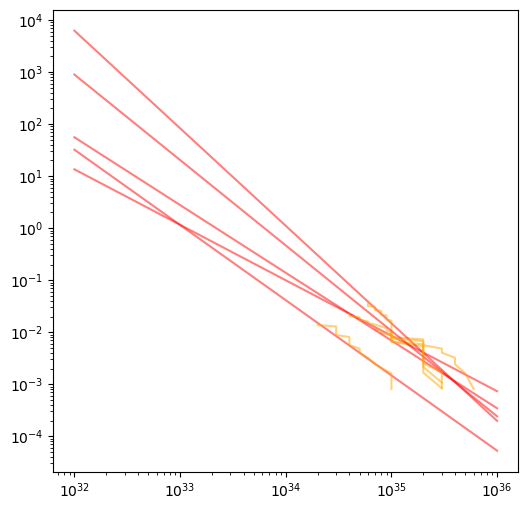

In [247]:
fig,ax = plt.subplots(figsize=(6, 6))

for kic in kics:
    f = okasel[okasel["KIC"] == kic].sort_values("E", ascending=True)
    f = f.iloc[len(f) // 3 :]
    ffd = FFD(f)
    lcs = lk.search_lightcurvefile(f"KIC {kic}", mission="Kepler", cadence="long").download_all()
    lcs = lcs.stitch()
    print(lcs.columns)
    flux = lcs.sap_flux[lcs.sap_quality == 0]
    
    time = len(flux) * 0.5 / 24
    ffd.tot_obs_time = time
    print(f"KIC {kic} {ffd.tot_obs_time} days")
    ed, freq, counts = ffd.ed_and_freq()

    bfa = ffd.fit_powerlaw("mcmc")

    # save bfa.samples to file
    df = pd.DataFrame(bfa.samples, columns=["beta", "alpha"])
    df.to_csv(f"../results/okamoto/okamoto_mcmc_samples_{kic}.csv", index=False)
    
    ffd.plot_powerlaw(ax=ax, custom_xlim=(1e32, 1e36), c='r', alpha=0.5)
    plt.plot(ed, freq, alpha=0.5,color="orange")
    
    print(lcs)
plt.xscale("log")
plt.yscale("log")

(0.01, 5.0)

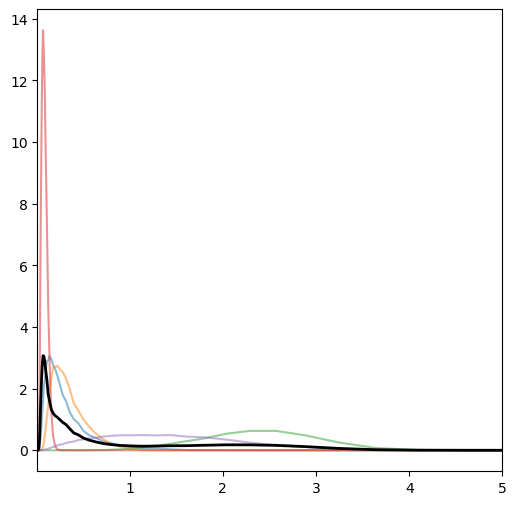

In [253]:
#plot frequencies of flares above emin for okamoto stars
bins=np.logspace(-3, 2, 100)
binmids = (bins[1:] + bins[:-1]) / 2  

plt.figure(figsize=(6, 6))

freqs = np.zeros(len(bins)-1)

for kic in kics:
    bfa = pd.read_csv(f"../results/okamoto/okamoto_mcmc_samples_{kic}.csv")
    beta, alpha = bfa["beta"].values, bfa["alpha"].values
    freq = beta / (alpha -1) * emin**(1-alpha) 
    
    norm = np.trapz(np.histogram(freq, bins=bins)[0], x=binmids)
    hist, bins = np.histogram(freq, bins=bins)
    plt.plot(binmids, hist/norm, alpha=0.5)
    freqs += hist/norm
    
plt.plot(binmids, freqs/len(kics), c="k", lw=2)
# plt.xscale("log")

kicfreqs = freqs/len(kics)

plt.xlim(0.01,5)


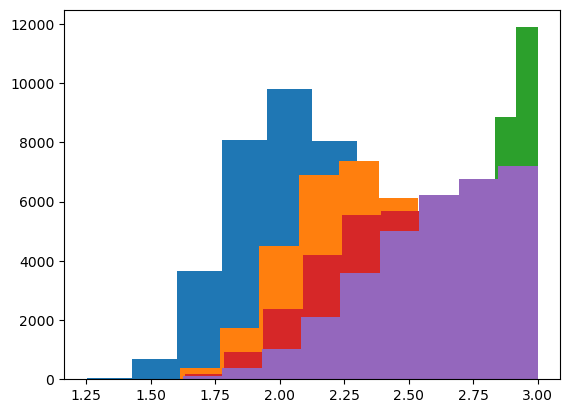

In [254]:
for kic in kics:
    bfa = pd.read_csv(f"../results/okamoto/okamoto_mcmc_samples_{kic}.csv")
    beta, alpha = bfa["beta"].values, bfa["alpha"].values

    plt.hist(alpha)

In [248]:
# Load the data from tu folder
stars = pd.read_csv("../data/tu/tu2020_stars.tsv", sep="\t", skiprows=45, header=None,
                    names=["TIC", "Teff_K", "logg", "radius_rsun","Prot_d","Nflares",
                           "Nset","freq_per_year", "flag", "simbad",
                           "RA_deg","DEC_deg"])

flares = pd.read_csv("../data/tu/tu2020_flares.tsv", sep="\t", skiprows=38, header=None, 
                     names=["TIC","peak_time","peak_flux_erg_s","ed_rec","duration_s"])


# hip 67522 flare energies
hip = pd.read_csv("../results/hip67522_flares.csv")


hip["ed_rec"] = hip["mean_bol_energy"]
emin = hip["ed_rec"].sort_values().values[1]

# get all the stars that have more than X flares
stars = stars[(stars.Nflares > 4) & (stars.flag != 'GM   ')].set_index("TIC")

teffmin, teffmax, rotmin, rotmax = stars["Teff_K"].min(), stars["Teff_K"].max(), stars["Prot_d"].min(), stars["Prot_d"].max()

stars

,Teff_K,logg,radius_rsun,Prot_d,Nflares,Nset,freq_per_year,flag,simbad,RA_deg,DEC_deg
TIC,,,,,,,,,,,
302116397,5531,4.39,1.05,0.95,5,1,67.93,,Simbad,322.54472,-24.19203
206592394,5597,4.54,0.88,3.43,8,1,111.91,,Simbad,20.83856,-57.48075
38402758,5472,4.42,1.00,1.08,6,1,97.62,,Simbad,54.42289,-6.99190
92347098,5234,4.48,0.90,3.93,5,1,81.34,,Simbad,51.43761,-20.70677
43472154,5316,4.49,0.90,2.80,16,1,233.17,,Simbad,74.70224,-8.72770
284789252,5789,4.41,1.05,0.87,6,1,88.45,,Simbad,76.72356,6.11554
53417036,5554,4.44,0.98,1.53,8,1,140.26,,Simbad,100.09316,-3.53308
127311608,5515,4.23,1.25,0.96,5,1,93.24,,Simbad,217.08070,-42.32614
50345701,5126,4.19,1.23,5.41,5,2,33.48,,Simbad,32.34824,-76.68766


No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 4.
Setting frequency values with new values, size 4.
Setting frequency adjusted count values with new values, size 4.


/home/ilin/anaconda3/lib/python3.11/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
/home/ilin/anaconda3/lib/python3.11/site-packages/altaipony/wheatland.py:313: RuntimeWarning: invalid value encountered in log
  f2 = M * np.log(alpha - 1)
100%|██████████| 500/500 [00:01<00:00, 320.30it/s]
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 6.
Setting frequency values with new values, size 6.
Setting frequency adjusted count values with new values, size 6.
100%|██████████| 500/500 [00:01<00:00, 318.79it/s]
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 4.
Setting frequency values with new values, size 4.
Setting frequency adjusted count values with new values, size 4.
100%|██████████| 500/500 [00:01<00:00, 328.12it/s]
No tot

(2e+33, 1e+37)

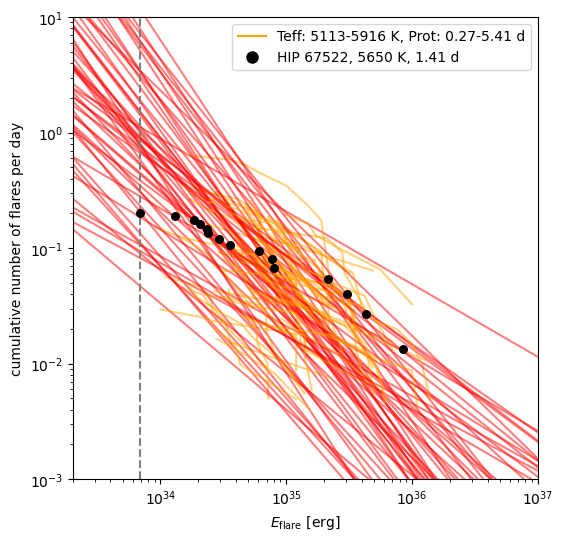

In [249]:
fig,ax = plt.subplots(figsize=(6, 6))
alphas, betas = [], []

for tic, s in stars.iterrows():
    f = flares[flares.TIC == tic]

    f = f.iloc[len(f) // 3 :]


    ffd = FFD(f)

    obstime = len(f) / (s.freq_per_year / 365.25) # days 
    ffd.tot_obs_time = obstime
    ed, freq, counts = ffd.ed_and_freq()

    bfa = ffd.fit_powerlaw("mcmc")

    alphas.append(ffd.alpha)
    betas.append(ffd.beta)

    # save bfa.samples to file
    df = pd.DataFrame(bfa.samples, columns=["beta", "alpha"])
    df.to_csv(f"../results/tu/tu2020_mcmc_samples_{tic}.csv", index=False)
    
    ffd.plot_powerlaw(ax=ax, custom_xlim=(1e33, 1e37), c='r', alpha=0.5)
    plt.plot(ed, freq, alpha=0.5,color="orange")# label=f"TIC {tic}, {s.Teff_K.values[0]} K, {s.Prot_d.values[0]} d",

# make an FFD for hip
ffdhip = FFD(hip)
ffdhip.tot_obs_time = 74.5
ed, freq, counts = ffdhip.ed_and_freq()
plt.scatter(ed, freq, c="k", s=30,zorder=10)

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E_{\rm flare}$ [erg]")
plt.ylabel("cumulative number of flares per day");
# plt.xlim(1e33, 1e36)
plt.ylim(1e-3, 1e1)

# make a legend handle with min and max values of teff and prot to add to the legend
handle = plt.Line2D([0], [0],  color='orange', markerfacecolor='w', markersize=10, 
                    label=f"Teff: {teffmin}-{teffmax} K, Prot: {rotmin}-{rotmax} d")

handlehip = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='k', markersize=10, 
                    label="HIP 67522, 5650 K, 1.41 d")

plt.legend(handles=[handle, handlehip], loc=0)

plt.axvline(hip.ed_rec.sort_values(ascending=True).iloc[1], c="grey", linestyle="--") # ignore the small CHEOPS flare

plt.xlim(2e33, 1e37)


In [198]:
ebs = pd.read_csv("../results/ziegler/EBs.tsv", sep="\t", skiprows=44, header=None,
                    names=["TIC", "yr","Obs","Sep","PA","Con","MinSep","Con0.15","Con1","Simbad","RA","DEC"])
ebs.TIC = ebs.TIC.astype(int)
etic = ebs.TIC.values
stic = stars.index.astype(int)
stic, etic

# find the overlap between the two sets
overlap = np.intersect1d(stic, etic)
overlap = np.append(overlap, 219389540) # known spectroscopic binary    

all 302116397 1.2787756574192943
all 206592394 2.5693582537636606
all 38402758 0.5043754696654552
all 92347098 0.31676249456110905
all 43472154 0.9021509462852388
all 284789252 1.0134078393360784
all 53417036 0.8031083817316365
all 127311608 2.2872814774131327
all 50345701 0.3558269228865654
all 175491080 0.6364496580470116
all 7586485 0.2510288597796047
all 44797824 1.1383853811345528
all 166874846 0.9021509462852388
all 168696027 0.5043754696654552
all 257644579 2.8862218757831775
all 20096356 0.44900265182461485
all 21434829 0.6364496580470116
all 21540586 1.1383853811345528
all 78055898 0.6364496580470116
all 140209922 0.44900265182461485
all 192848409 0.3558269228865654
all 290716988 0.19893607836862015
all 393228453 4.091144937396792
all 132965136 1.0134078393360784
all 398085117 0.7149391966648556
all 311794619 0.5665770867197858
all 118541883 0.5043754696654552
all 342169848 0.31676249456110905
all 383664368 0.6364496580470116
all 383134735 0.31676249456110905
all 261236136 0.3

(0.0, 8.0)

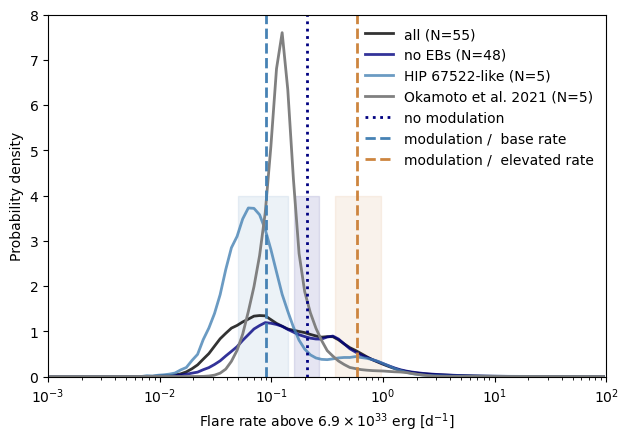

In [246]:
bins=np.logspace(-3, 2, 100)
binmids = (bins[1:] + bins[:-1]) / 2    
# bins = np.linspace(0, 10, 50)

sss = stars[(stars.Nflares > 4)]
sss0 = sss
# exclude tic 167574282 and 348898049
sss1 = sss.drop(overlap) # eclipsing binaries from Ziegler et al. 2021 

sss2 = sss.drop(overlap) # stars with flares from both Ziegler et al. 2021 and Tu et al. 2020
sss2 = sss2[(sss2["Prot_d"] < 2) & (sss2["Prot_d"] > 1) & (sss2["Teff_K"] > 5500)  & (sss2["Teff_K"] < 5800)]
color = ["k", "navy", "steelblue"]
plt.figure(figsize=(7.2, 4.7))
for sss, label in list(zip([sss0, sss1, sss2], ["all", "no EBs", "HIP 67522-like"])):
    hists = np.zeros(len(bins)-1)

    maxfreq = 0
    for tic, s in sss.iterrows():
        df = pd.read_csv(f"../results/tu/tu2020_mcmc_samples_{tic}.csv")
        df = df.iloc[2000:]
        freq = df["beta"] / (df["alpha"] - 1) * (emin)**(-df["alpha"] + 1)
        hist, bins = np.histogram(freq, bins=bins, density=True)
        norm = np.trapz(hist, binmids)
        print(label, tic, binmids[np.argmax(hist)])
        # plt.hist(freq, density=True, alpha=0.4)
        hists += hist/norm
        if max(hist/norm) > maxfreq:
            maxfreq = max(hist/norm)
            # print(tic, maxfreq)
    plt.plot(binmids, hists/len(sss), lw=2, alpha=0.8, label=label + f" (N={len(sss)})", c=color.pop(0))
plt.xscale("log")
# plt.yscale("log")
# plt.xlim(0, 10)
plt.xlabel(r"Flare rate above $6.9 \times 10^{33}$ erg [d$^{-1}$]")
plt.ylabel("Probability density")

plt.plot(binmids, kicfreqs, c="grey", lw=2, label=f"Okamoto et al. 2021 (N={len(kics)})")

plt.axvline(0.21, c="navy", linestyle=":", label="no modulation", lw=2)
# fill between 0.14 and 0.24
plt.fill_between([0.16, 0.27], 0, 4, color="navy", alpha=0.1)

plt.axvline(0.09, c="steelblue", linestyle="--", label="modulation /  base rate", lw=2)
plt.fill_between([0.05, 0.14], 0, 4, color="steelblue", alpha=0.1)
plt.axvline(0.59, c="peru", linestyle="--", label="modulation /  elevated rate", lw=2)
plt.fill_between([0.37, 0.97], 0, 4, color="peru", alpha=0.1)
plt.xlim(1e-3, 1e2)

plt.legend( frameon=False)
np.trapz(hists/len(sss), binmids)    
plt.ylim(0, 8)
# plt.yscale("log")

array([-0.69397743,  0.51919644,  0.79971537, -0.30726545,  0.07555671,
        0.03341282])

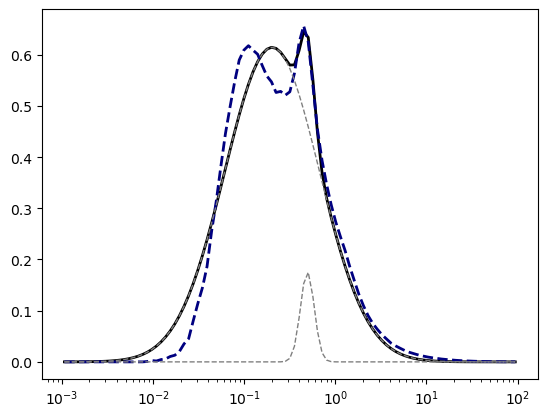

In [130]:
# fit a Gaussian to the distribution?
from scipy.stats import norm
from scipy.optimize import curve_fit


def gauss(x, mu, sigma, A, mu2, sigma2, A2):
    return A * norm.pdf(np.log10(x), mu, sigma) + A2 * norm.pdf(np.log10(x), mu2, sigma2)

popt, pcov = curve_fit(gauss, binmids, hists/len(sss2), p0=[-1.8, 0.1, 1., -0.4, 0.02, 0.8])

plt.plot(binmids, gauss(binmids, *popt), c="k", lw=2, ls="-")
plt.plot(binmids, hists/len(sss2), c="navy", lw=2, ls="--")

# plot each indidivual gaussian
plt.plot(binmids, popt[2] * norm.pdf(np.log10(binmids), popt[0], popt[1]), c="grey", lw=1, ls="--")
plt.plot(binmids, popt[5] * norm.pdf(np.log10(binmids), popt[3], popt[4]), c="grey", lw=1, ls="--")



plt.xscale("log")
# plt.yscale("log")
popt

In [143]:
# define likelihood function
def log_likelihood(theta, x, y):
    mu, sigma, A, mu2, sigma2, A2 = theta
    model = gauss(x, mu, sigma, A, mu2, sigma2, A2)
    return -0.5 * np.sum((y - model) ** 2) / sigma**2

# define priors
def log_prior(theta):
    mu, sigma, A, mu2, sigma2, A2 = theta
    if -3 < mu < 3 and 0 < sigma < 3 and 0 < A < 1 and -3 < mu2 < 3 and 0 < sigma2 < 3 and 0 < A2 < 1:
        return 0
    
    return -np.inf

# define posterior
def log_posterior(theta, x, y):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y)

# define initial guess
theta_guess = popt

# define number of walkers
nwalkers = 32

# define number of steps
nsteps = 10000

# set up initial positions of walkers
pos = theta_guess + 1e-4 * np.random.randn(nwalkers, len(theta_guess))

# set up sampler
import emcee

sampler = emcee.EnsembleSampler(nwalkers, len(theta_guess), log_posterior, args=(binmids, hists/len(sss2)))

# run sampler
sampler.run_mcmc(pos, nsteps, progress=True);

100%|██████████| 10000/10000 [00:17<00:00, 571.64it/s]


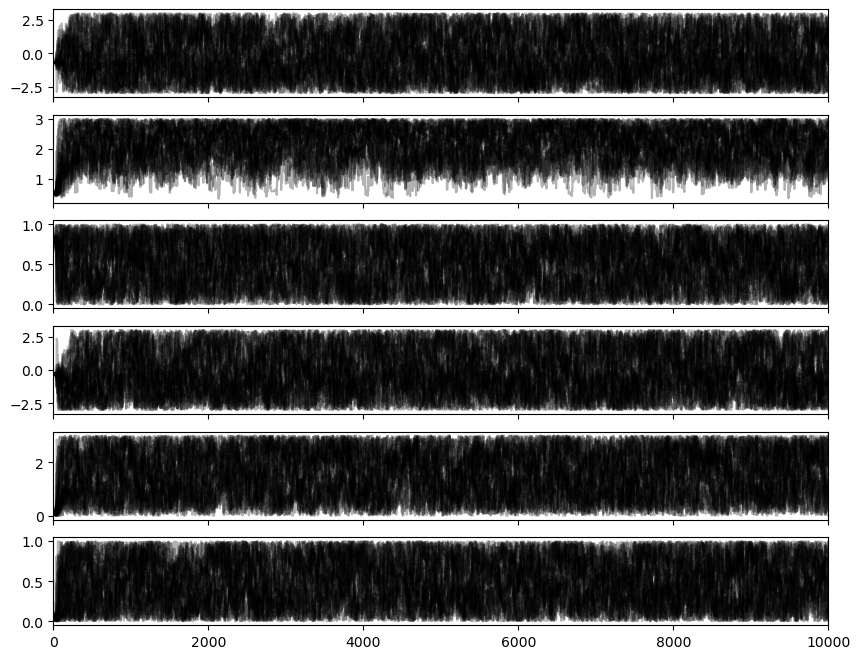

In [144]:
# get chain
mod_samples = sampler.get_chain()

fig, axes = plt.subplots(6, figsize=(10, 8), sharex=True)

for i in range(6):
    ax = axes[i]
    ax.plot(mod_samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(mod_samples))
    # ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.05, 0.5)





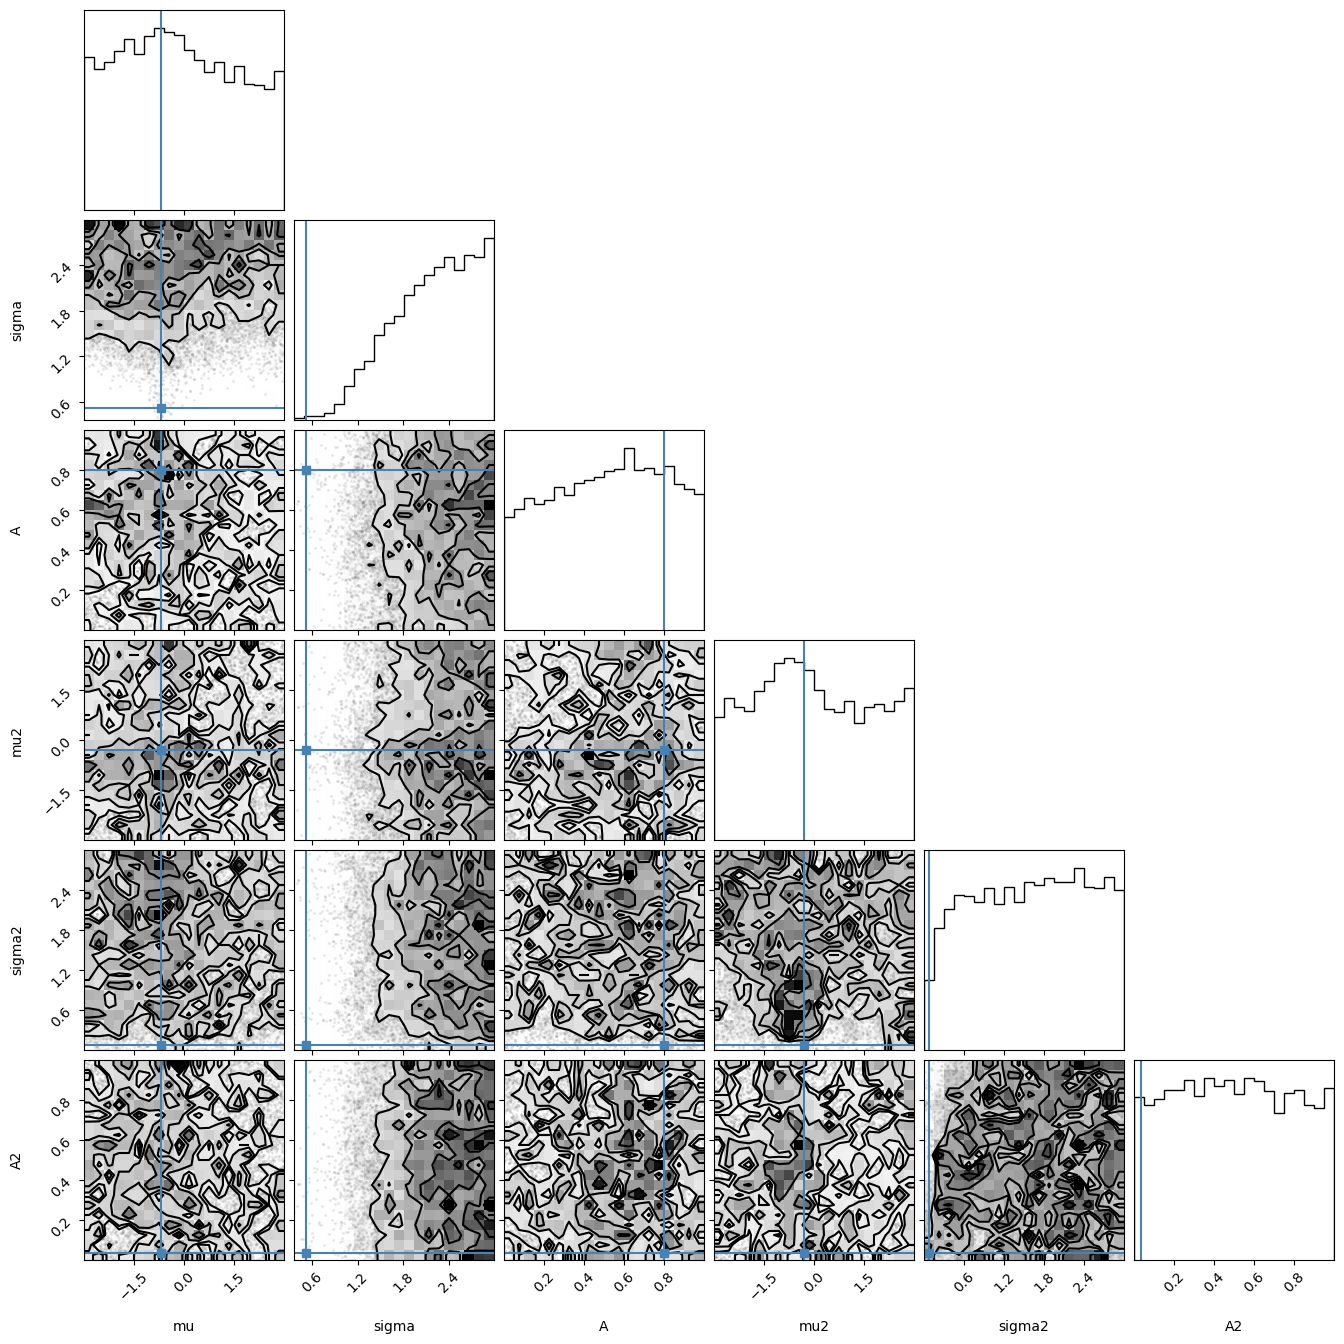

In [145]:
# plot the corner plot
import corner

flat_samples = sampler.get_chain(discard=5000, thin=15, flat=True)

fig = corner.corner(flat_samples, labels=["mu", "sigma", "A", "mu2", "sigma2", "A2"], truths=popt)


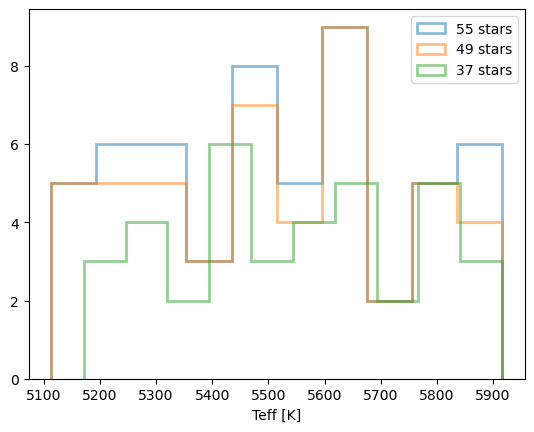

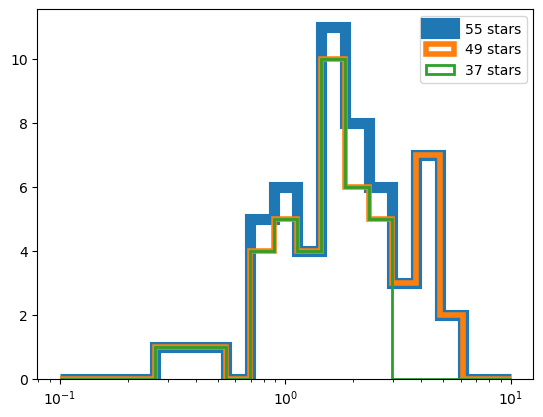

In [119]:
for sss in [sss0, sss1, sss2]:
    plt.hist(sss.Teff_K, histtype="step", bins=10, lw=2, alpha=0.5, label=f"{len(sss)} stars")
plt.legend()
plt.xlabel("Teff [K]")


plt.figure()
lw, inc = 8, 1
for sss in [sss0, sss1, sss2]:
    plt.hist(sss.Prot_d, histtype="step", bins=np.logspace(-1, 1, 20), lw=lw/inc, alpha=1, label=f"{len(sss)} stars")
    inc *= 2
plt.legend()
plt.xscale("log")

In [38]:
len(sss)

11

(0.0, 1.0)

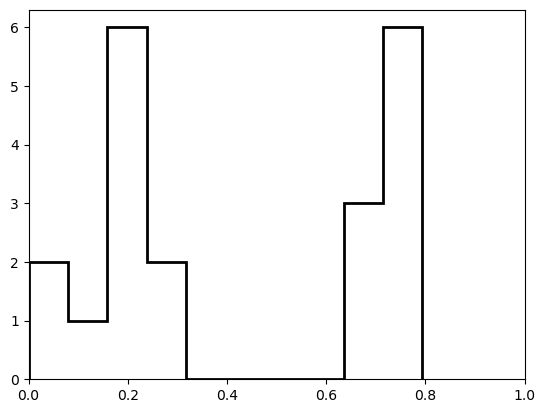

In [11]:
hip67522tess = pd.read_csv("../data/hip67522_tess_flares.csv")
cheopsflares = pd.read_csv('../results/cheops_flares.csv')

timest = hip67522tess.tstart + 2457000
timesc = cheopsflares.t_peak_BJD

times = pd.concat([timest, timesc])

hip67522params = pd.read_csv("../data/hip67522_params.csv")

period = hip67522params[hip67522params.param=="orbper_d"].val.values[0]

phs = ((times - times.min()) / period /2 ) % 1

plt.hist(phs, bins=10, histtype="step", color="k", lw=2)

plt.xlim(0,1)


In [12]:
cheopsflares

,newpipe,newmed,amplitude,t_peak_BJD,dur_d,amplitude2,t_peak_BJD2,dur_d2,ED,EDerr,mean_bol_energy,std_bol_energy,ingress,egress,tmin,tmax,parametrization,flare_factor
0,103i,2.501602e+06,113363.897003,2.460393e+06,0.046561,262747.637413,2.460393e+06,0.014968,272.000,11.4000,8.349792e+35,7.528214e+34,NaN,2.460393e+06,2460392.76,2460392.930,davenport2014,3.080000e+33
1,104i,2.544595e+06,31796.719489,2.460400e+06,0.028244,NaN,NaN,NaN,24.900,0.3200,7.679944e+34,6.724595e+33,NaN,2.460400e+06,2460399.97,2460400.090,davenport2014,3.060000e+33
2,107i,2.456938e+06,8976.188211,2.460456e+06,0.025017,NaN,NaN,NaN,4.700,0.1350,1.451642e+34,1.345120e+33,NaN,2.460455e+06,2460455.63,2460455.670,davenport2014,3.090000e+33
3,102ch,2.470058e+06,5656.610401,2.460413e+06,0.003160,NaN,NaN,NaN,0.566,0.0881,1.743483e+33,3.061822e+32,2.460413e+06,NaN,2460413.16,2460413.225,davenport2014,3.080000e+33
4,104i,2.544595e+06,30459.141929,2.460400e+06,0.014672,NaN,NaN,NaN,24.600,0.4670,7.653623e+34,6.373084e+33,NaN,2.460400e+06,2460399.97,2460400.090,mendoza2022,3.100217e+33
5,107i,2.456938e+06,8275.732420,2.460456e+06,0.013487,NaN,NaN,NaN,4.720,1.4300,1.304611e+34,4.535955e+33,NaN,2.460455e+06,2460455.63,2460455.670,mendoza2022,3.064905e+33
6,103i,2.501602e+06,111796.759197,2.460393e+06,0.031858,434906.040903,2.460393e+06,0.003020,277.000,9.9100,8.479623e+35,7.777912e+34,NaN,2.460393e+06,2460392.76,2460392.930,mendoza2022,3.078721e+33
7,102ch,2.471588e+06,12841.499812,2.460413e+06,0.000128,NaN,NaN,NaN,0.125,0.0190,3.910000e+32,6.720000e+31,2.460413e+06,NaN,2460413.16,2460413.225,mendoza2022,3.090000e+33


In [13]:
hip.ed_rec.sort_values(ascending=True).iloc[1]

6.87362349239785e+33

No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 5.
Setting frequency values with new values, size 5.
Setting frequency adjusted count values with new values, size 5.
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 8.
Setting frequency values with new values, size 8.
Setting frequency adjusted count values with new values, size 8.
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 6.
Setting frequency values with new values, size 6.
Setting frequency adjusted count values with new values, size 6.
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 5.
Setting frequency values with new values, size 5.
Setting frequency adjusted count values with new valu

TIC 302116397 26.884292654202852 days
TIC 206592394 26.11026717898311 days
TIC 38402758 22.44929317762753 days
TIC 92347098 22.452053110400783 days
TIC 43472154 25.063258566710985 days
TIC 284789252 24.776710005652912 days
TIC 53417036 20.832739198631113 days
TIC 127311608 19.58655083655084 days
TIC 50345701 54.54749103942653 days
TIC 175491080 41.67142042213349 days
TIC 7586485 47.52765126870526 days
TIC 44797824 47.51219512195122 days
TIC 166874846 47.50704530674181 days
TIC 168696027 47.509105098855365 days
TIC 257644579 47.521467603434814 days
TIC 20096356 45.8928851892571 days
TIC 21434829 45.89391491653203 days
TIC 21540586 45.89208432221137 days
TIC 78055898 45.891443648699585 days
TIC 140209922 45.895287958115176 days
TIC 192848409 45.89391491653203 days
TIC 290716988 45.91039683964806 days
TIC 393228453 45.90730557737628 days
TIC 132965136 47.509105098855365 days
TIC 398085117 48.39579784213515 days
TIC 311794619 54.71090473337327 days
TIC 118541883 64.19156414762742 days
TIC 

Setting ED with new values, size 5.
Setting frequency values with new values, size 5.
Setting frequency adjusted count values with new values, size 5.
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 7.
Setting frequency values with new values, size 7.
Setting frequency adjusted count values with new values, size 7.
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 5.
Setting frequency values with new values, size 5.
Setting frequency adjusted count values with new values, size 5.
No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 6.
Setting frequency values with new values, size 6.
Setting frequency adjusted count values with new values, size 6.
No total observing time given. Set to 1. You are now working with number counts instead of

TIC 309714906 96.32120253164557 days
TIC 355235442 89.33438155136268 days
TIC 382527709 96.88328912466844 days
TIC 270677813 141.2048969072165 days
TIC 167123841 142.3051948051948 days
TIC 269855929 174.8653500897666 days
TIC 382575703 159.89681050656662 days
TIC 219212899 160.11933755479785 days
TIC 260268898 209.1624910522548 days
TIC 279572957 209.76310122038765 days
TIC 260164371 204.05027932960894 days
TIC 149539114 222.89875173370322 days
TIC 294098955 255.12223515715948 days
TIC 38827910 258.3097595473833 days
TIC 279570232 305.64853556485355 days
TIC 364588501 305.38487060384875 days
TIC 293273183 304.88313856427374 days


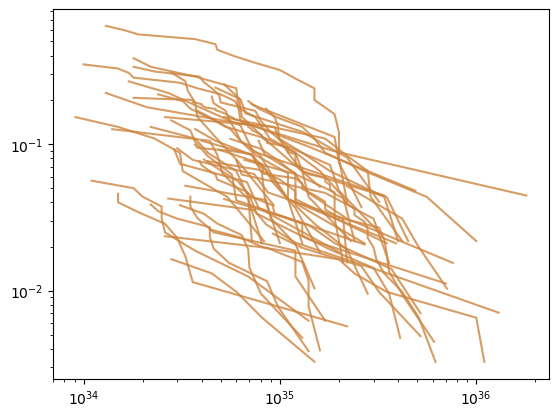

In [436]:

eds, freqs, errs = [], [], []
for tic, s in sss1.iterrows():
    f = flares[flares.TIC == tic]

    ffd = FFD(f)

    obstime = len(f) / (s.freq_per_year / 365.25) # days 
    print(f"TIC {tic} {obstime} days")
    ffd.tot_obs_time = obstime
    ed, freq, counts = ffd.ed_and_freq()
    eds.append(ed)
    freqs.append(freq)
    err = np.sqrt(np.cumsum(np.ones_like(ed))) / obstime
    err = err[::-1]
    errs.append(err)
    plt.plot(ed, freq, alpha=0.8,color="peru")# label=f"TIC {tic}, {s.Teff_K.values[0]} K, {s.Prot_d.values[0]} d",

plt.xscale("log")
plt.yscale("log")

No total observing time given. Set to 1. You are now working with number counts instead of frequency.
Setting ED with new values, size 15.
Setting frequency values with new values, size 15.
Setting frequency adjusted count values with new values, size 15.


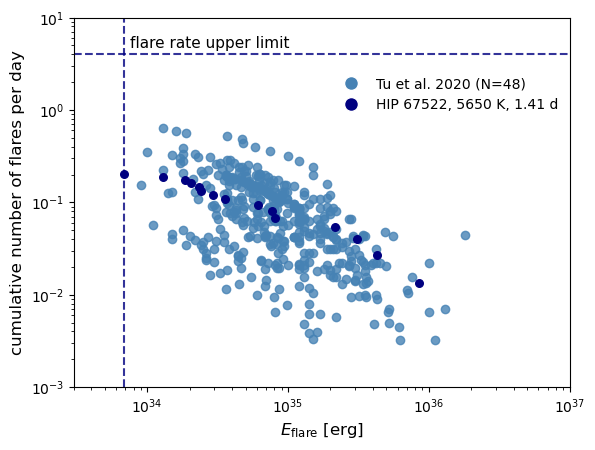

In [493]:

plt.figure()


# make an FFD for hip
ffdhip = FFD(hip[hip.ed_rec >= emin])
ffdhip.tot_obs_time = 74.5
ed, freq, counts = ffdhip.ed_and_freq()
plt.scatter(ed, freq, c="navy", s=30,zorder=10)


plt.xscale("log")
plt.yscale("log")

for ed, freq, err in zip(eds, freqs, errs):
    plt.scatter(ed, freq, alpha=0.8, color="steelblue")

plt.axvline(emin, c="navy", linestyle="--", alpha=0.8)
plt.axhline(4, c="navy", linestyle="--", alpha=0.8)
plt.text(emin*1.1, 4*1.1, f"flare rate upper limit", fontsize=11, va="bottom", ha="left")

plt.xlim(3e33, 1e37)
plt.xlabel(r"$E_{\rm flare}$ [erg]", fontsize=12)
plt.ylabel("cumulative number of flares per day", fontsize=12);

# make legend handles
handle = plt.Line2D([0], [0], marker="o", color='w', markerfacecolor='steelblue', markersize=10, 
                    label=f"Tu et al. 2020 (N={len(eds)})")

handlehip = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='navy', markersize=10,
                    label="HIP 67522, 5650 K, 1.41 d")


plt.legend(handles=[handle, handlehip], loc=(0.52, 0.73), frameon=False)

plt.ylim(1e-3, 1e1)
plt.savefig("../plots/paper/tu.png", dpi=300, bbox_inches="tight")

In [497]:
sss1.Prot_d.min(),  sss1.Prot_d.max(), sss1.Teff_K.min(), sss1.Teff_K.max()

(0.27, 5.41, 5113, 5916)